
各自のGoogleColab環境で実行したい場合は左上の[ファイル]→[ドライブにコピーを保存]を押してもらうと、各自のGoogleDriveにこちらのipynbのコピーが保存されますのでそちらで作業するようにしてください。ちなみにこのipynbは読み取り専用にしておくので実行できないようになっております。

事前準備として以下の項目をあらかじめやっておいて下さい。
- 個人用のGoogleアカウントを作成しておくこと
- GoogleColaboratoryを使えるようにしておくこと

GoogleColabratoryの基本的な使い方は下記リンク等を参照してください。

- [Qiita - 【秒速で無料GPUを使う】深層学習実践Tips on Colaboratory](https://qiita.com/tomo_makes/items/b3c60b10f7b25a0a5935)

# Project5
ニューラルネットワークについての課題

# 流れ

サンプル
1. MLP (Multilayer perceptron)
2. CNN (Convolutional Neural Network)
3. RNN (Recurrent Neural Network)

課題のための実例
1. CNN (ジェスチャーデータ)
2. RNN (HandDB Character Classification)
3. RNN + CNN (HandDB)
4. FFT + CNN (SignDB Signature Verification)

課題
1. 小文字のアルファベット画像をCNNで多クラス分類する。
2. オンライン文字の署名データを本人か別人かをRNNで識別する。(Signature Verification)


# サンプル

## MLP(MultiLayer Perceptron)のサンプル

MLPを実装しIrisのデータセットを学習させます。<br>

### データについて

Irisのデータセットとは、機械学習や統計分野で古くから用いられている有名なデータセットで、150×4のnumpy.ndarrayに格納された3種類の品種（Setosa, Versicolour, Virginica）の花弁とガクの長さで構成されています。

#### データセットのロード

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

#### データセットの説明

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 花の種類
Setosa, Versicolour, Virginicaの3種類

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### データを眺める

In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


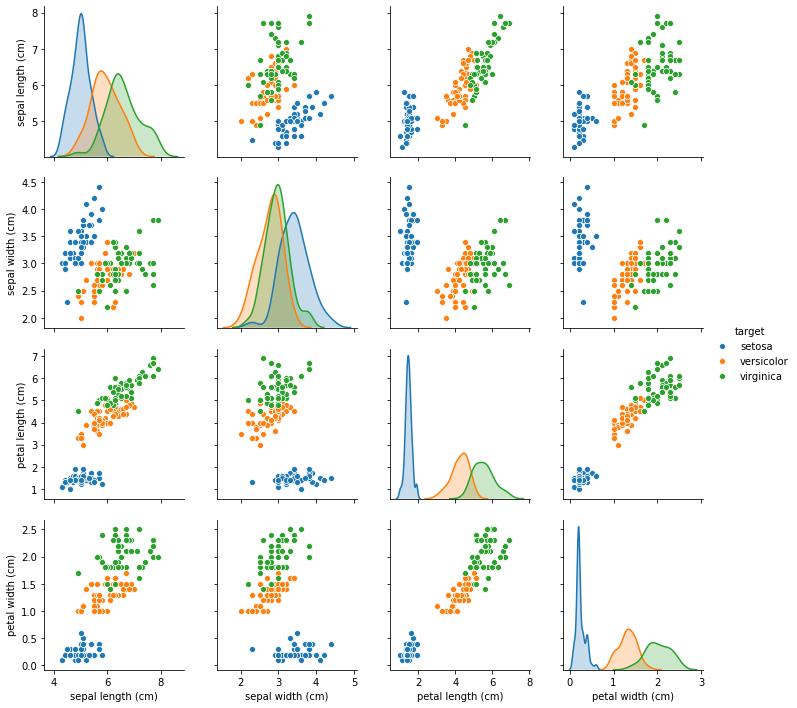

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="target")

### MLPについて
ここでは、kerasを使いMLPを実装します。<br>
4つの特徴からどの種類に分類されるかを予想するモデルを作成します。


#### 使用データ

In [ ]:
X = iris.data
y = iris.target

#### ハイパーパラメータ

In [ ]:
num_classes = len(iris.target_names)
batch_size = 5
epochs = 20
seed = 7

#### MLPの構築

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import tensorflow as tf

model = tf.keras.Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#### モデルの可視化

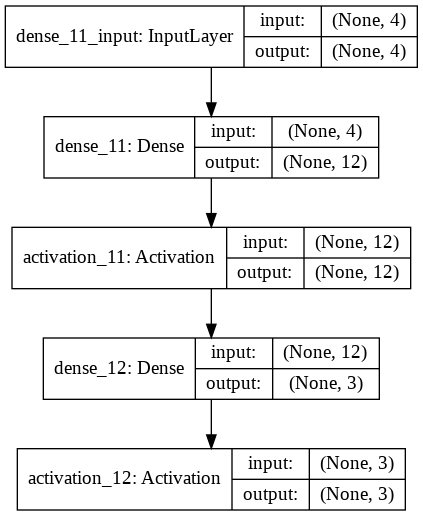

In [ ]:
from keras.utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### モデルの学習
実装したMLPがどれだけ本当に母集団に対処できるかを検証・確認するために5分割のクロスバリデーションを適用します。<br>

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=seed, shuffle=True)
predicted = np.empty(len(y))
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
  predicted[test_index] = np.argmax(model.predict(X_test), axis=1)

Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 678us/step - loss: 0.0745 - acc: 0.9667 - val_loss: 0.1068 - val_acc: 0.9333
Epoch 2/20
120/120 [==============================] - 0s 612us/step - loss: 0.0700 - acc: 0.9833 - val_loss: 0.1448 - val_acc: 0.9333
Epoch 3/20
120/120 [==============================] - 0s 588us/step - loss: 0.0746 - acc: 0.9667 - val_loss: 0.1006 - val_acc: 0.9667
Epoch 4/20
120/120 [==============================] - 0s 610us/step - loss: 0.0849 - acc: 0.9583 - val_loss: 0.1292 - val_acc: 0.9333
Epoch 5/20
120/120 [==============================] - 0s 621us/step - loss: 0.0745 - acc: 0.9917 - val_loss: 0.1099 - val_acc: 0.9667
Epoch 6/20
120/120 [==============================] - 0s 604us/step - loss: 0.0964 - acc: 0.9667 - val_loss: 0.1378 - val_acc: 0.9333
Epoch 7/20
120/120 [==============================] - 0s 586us/step - loss: 0.0629 - acc: 0.9833 - val_loss: 0.1652 - val_acc: 0.9333
Epoch 8/20
120/12

### 結果について

#### テストデータについての精度

In [ ]:
from sklearn.metrics import accuracy_score
print('Test accuracy:', accuracy_score(y, predicted))

Test accuracy: 0.94


#### テストデータについての混同行列

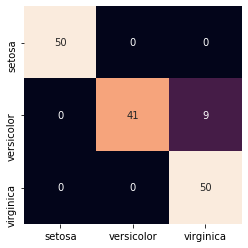

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx = confusion_matrix(y, predicted)
df_cmx = pd.DataFrame(cmx, index=iris.target_names, columns=iris.target_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## CNNのサンプル

CNNを実装しMNISTを学習させてみます。<br>

### データについて

MNIST(Mixed National Institute of Standards and Technology database)とは、手書き数字画像60,000枚と、テスト画像10,000枚を集めた、画像データセットです。さらに、手書きの数字「0〜9」に正解ラベルが与えられるデータセットでもあり、画像分類問題でよく使われるデータセットです。<br>

#### データのロード

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


#### データを眺める

In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print("X_train[0]:")
print(X_train[0])

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
X_train[0]:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0

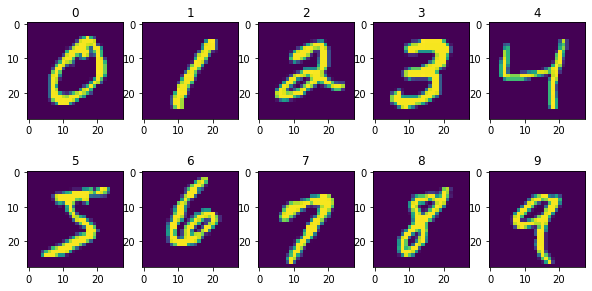

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(X_train[y_train.tolist().index(i)])
  ax.set_title(i)

#### データの正規化

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
from keras import backend as K
img_rows, img_cols = X_train.shape[1:3]
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### CNNについて

#### パラメータ

In [ ]:
batch_size = 128
num_classes = 10
epochs = 50

#### モデル作成

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### モデルの可視化

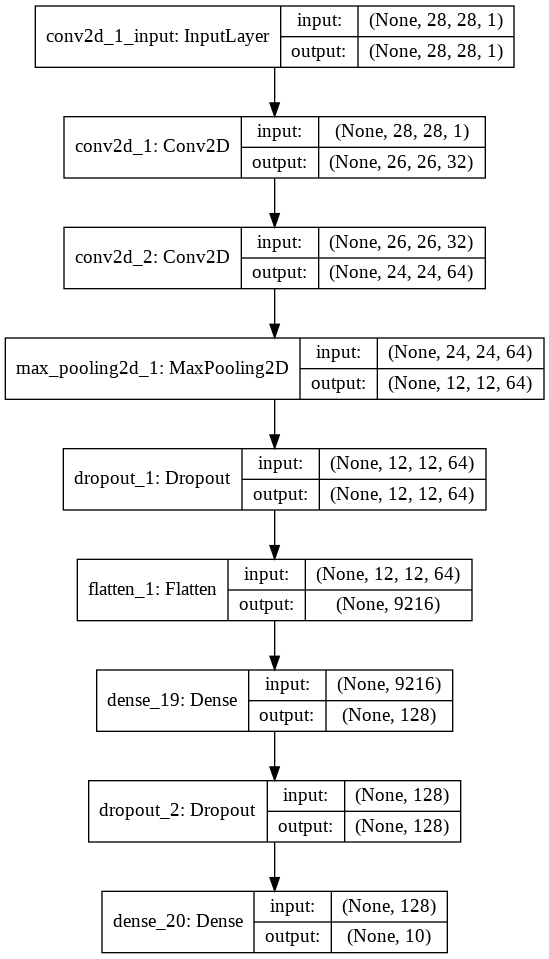

In [ ]:
from keras.utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### モデルの学習

In [ ]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.2702 - acc: 0.9173 - val_loss: 0.0590 - val_acc: 0.9807
Epoch 2/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0896 - acc: 0.9737 - val_loss: 0.0420 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0678 - acc: 0.9798 - val_loss: 0.0355 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0547 - acc: 0.9833 - val_loss: 0.0332 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0486 - acc: 0.9852 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0285 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0282 - val_ac

### 結果について

#### テストデータに対する精度

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02633124580890726
Test accuracy: 0.9919


#### 学習過程の可視化

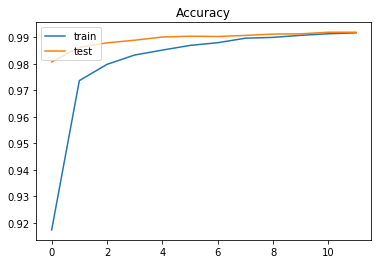

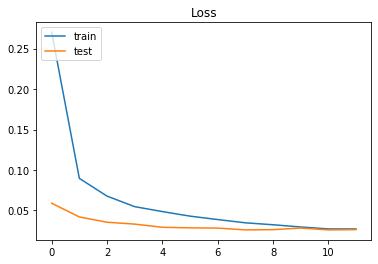

In [ ]:
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### テストデータに対する混同行列

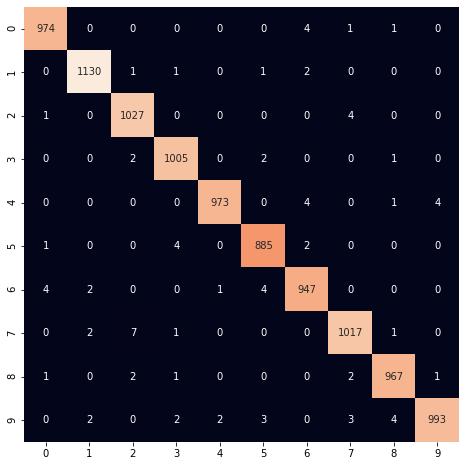

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
df_cmx = pd.DataFrame(cmx)
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## RNNのサンプル

RNNを実装してProject0のデータについて試してみます。<br>

### データについて

#### データの説明

**Human Action Recognition Data**

In the data folder there are 4 folders for acceleration data. Folder act01, act02, act03 are for 'Walking', 'Sitting', 'Jogging' human action data respectively. Each folder has 7 text files containing action data. And the test folder containing 10 text files of human action data as unknown test data.

#### データのロード

In [ ]:
!wget  "https://drive.google.com/uc?export=download&id=1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP" -O project0_data.zip
!unzip project0_data.zip

--2021-03-26 04:55:58--  https://drive.google.com/uc?export=download&id=1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP
Resolving drive.google.com (drive.google.com)... 74.125.195.102, 74.125.195.100, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0circrb87a7ujrobsomppidjm0jjojhn/1616734500000/12360162376384578551/*/1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP?e=download [following]
--2021-03-26 04:55:59--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0circrb87a7ujrobsomppidjm0jjojhn/1616734500000/12360162376384578551/*/1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP?e=download
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-10-3c-docs.googleusercontent.com (doc-10-

In [ ]:
import numpy as np
import os
import glob
target_acts = ["act01", "act02", "act03"]
X_train = []
y_train = []
for i, target_act in enumerate(target_acts):
  for fname in sorted(glob.glob(os.path.join(target_act, "*.txt"))):
    X_train.append(np.loadtxt(fname))
    y_train.append(i)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_test = []
for fname in sorted(glob.glob(os.path.join("test", "*.txt"))):
  X_test.append(np.loadtxt(fname))
X_test = np.array(X_test)
y_test = np.array([1, 2, 2, 2, 0, 2, 0, 1, 0, 1])

#### データを眺める

In [ ]:
X_train.shape

(21, 101, 3)

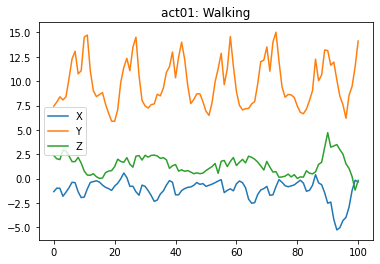

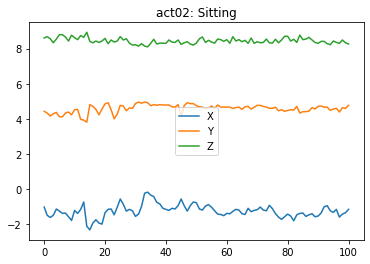

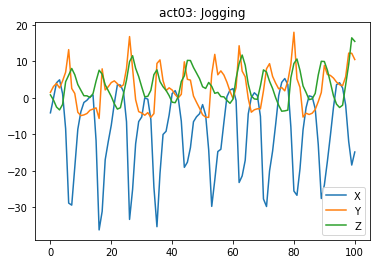

In [ ]:
import matplotlib.pyplot as plt
act_names = ["Walking", "Sitting", "Jogging"]
for i in range(3):
  # for data in X_train[y_train==i]:
  #   plt.plot(data)
  plt.plot(X_train[y_train==i][0])
  plt.title(target_acts[i]+": "+act_names[i])
  plt.legend(["X", "Y", "Z"])
  plt.show()

### RNNについて
ここではRNNの一種であるLSTMを使用する

#### パラメータ

In [ ]:
timesteps, features = X_train.shape[-2:]
num_classes = len(target_acts)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 101
Features: 3
# of Classes: 3


#### モデルの構築

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=0., input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#### モデルの可視化

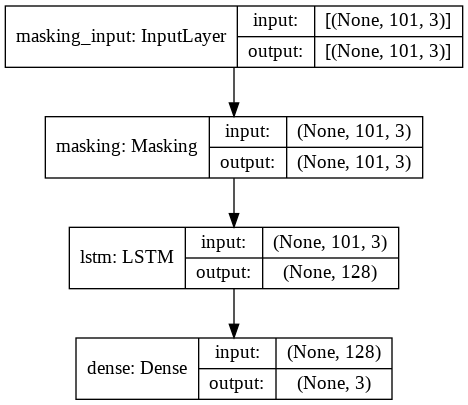

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

#### ハイパーパラメータ

In [ ]:
batch_size=7
epochs=10

#### モデルの学習

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
3/3 [==============================] - 5s 391ms/step - loss: 1.0295 - accuracy: 0.5655 - val_loss: 0.3410 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 137ms/step - loss: 0.3512 - accuracy: 1.0000 - val_loss: 0.1604 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 137ms/step - loss: 0.1453 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 139ms/step - loss: 0.0832 - accuracy: 1.0000 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 139ms/step - loss: 0.0470 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 140ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 136ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

### 結果について

#### テストデータに対するの精度

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00867924652993679
Test accuracy: 1.0


#### 学習過程の可視化

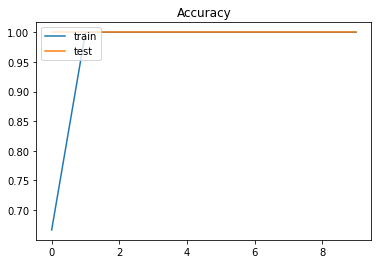

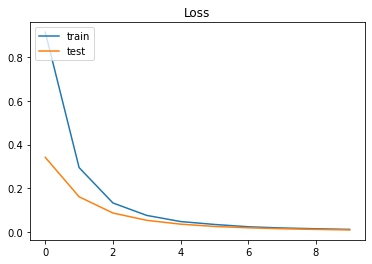

In [ ]:
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### テストデータに対する混同行列

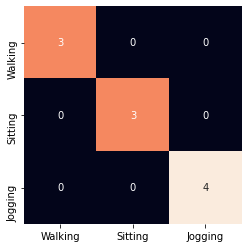

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
act_names = ["Walking", "Sitting", "Jogging"]
df_cmx = pd.DataFrame(cmx, index=act_names, columns=act_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

# 課題のための実例

## CNN

ハンドジェスチャーのデータセット( https://www.u-aizu.ac.jp/labs/is-pp/pplab/swr/sign_word_dataset.zip )を使う。

### データについて

#### データの説明

There were twenty isolated hand gestures (11 single-hand gestures and nine double hand gestures). The images of the dataset were collected with a pixel resolution of 200 × 200.

#### データのロード

In [ ]:
!wget https://www.u-aizu.ac.jp/labs/is-pp/pplab/swr/sign_word_dataset.zip
!unzip sign_word_dataset.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: sign word dataset/Sit/464.jpg  
  inflating: sign word dataset/Sit/465.jpg  
  inflating: sign word dataset/Sit/466.jpg  
  inflating: sign word dataset/Sit/467.jpg  
  inflating: sign word dataset/Sit/468.jpg  
  inflating: sign word dataset/Sit/469.jpg  
  inflating: sign word dataset/Sit/47.jpg  
  inflating: sign word dataset/Sit/470.jpg  
  inflating: sign word dataset/Sit/471.jpg  
  inflating: sign word dataset/Sit/472.jpg  
  inflating: sign word dataset/Sit/473.jpg  
  inflating: sign word dataset/Sit/474.jpg  
  inflating: sign word dataset/Sit/475.jpg  
  inflating: sign word dataset/Sit/476.jpg  
  inflating: sign word dataset/Sit/477.jpg  
  inflating: sign word dataset/Sit/478.jpg  
  inflating: sign word dataset/Sit/479.jpg  
  inflating: sign word dataset/Sit/48.jpg  
  inflating: sign word dataset/Sit/480.jpg  
  inflating: sign word dataset/Sit/481.jpg  
  inflating: sign word dataset/Sit/482.jpg  
  inflating: sign word da

In [ ]:
import numpy as np
from PIL import Image
import os
import glob

dname = "sign word dataset"
target_names = [f for f in os.listdir(path=dname) if os.path.isdir(os.path.join(dname, f))]

X = []
y = []

img_size = (64, 64)

for i, target_name in enumerate(target_names):
  for fname in sorted(glob.glob(os.path.join(dname, target_name, "*.jpg")), key=lambda a: int(os.path.basename(a).split(".")[0])):
    X.append(np.array(Image.open(fname).resize(img_size), dtype="float32"))
    y.append(i)
X = np.array(X)
y = np.array(y)

#### データを眺める

In [ ]:
print('X shape:', X.shape)
print(X.shape[0], 'samples')
print("ジェスチャーの種類:")
print(target_names)

X shape: (18000, 64, 64, 3)
18000 samples
ジェスチャーの種類:
['Please', 'Yes', 'ILoveYou', 'Call', 'Sit', 'Home', 'Single', 'Help', 'Correct', 'Like', 'Work', 'Fine', 'You', 'Love', 'No', 'Close', 'Wash', 'Cold', 'Tall', 'Ok']


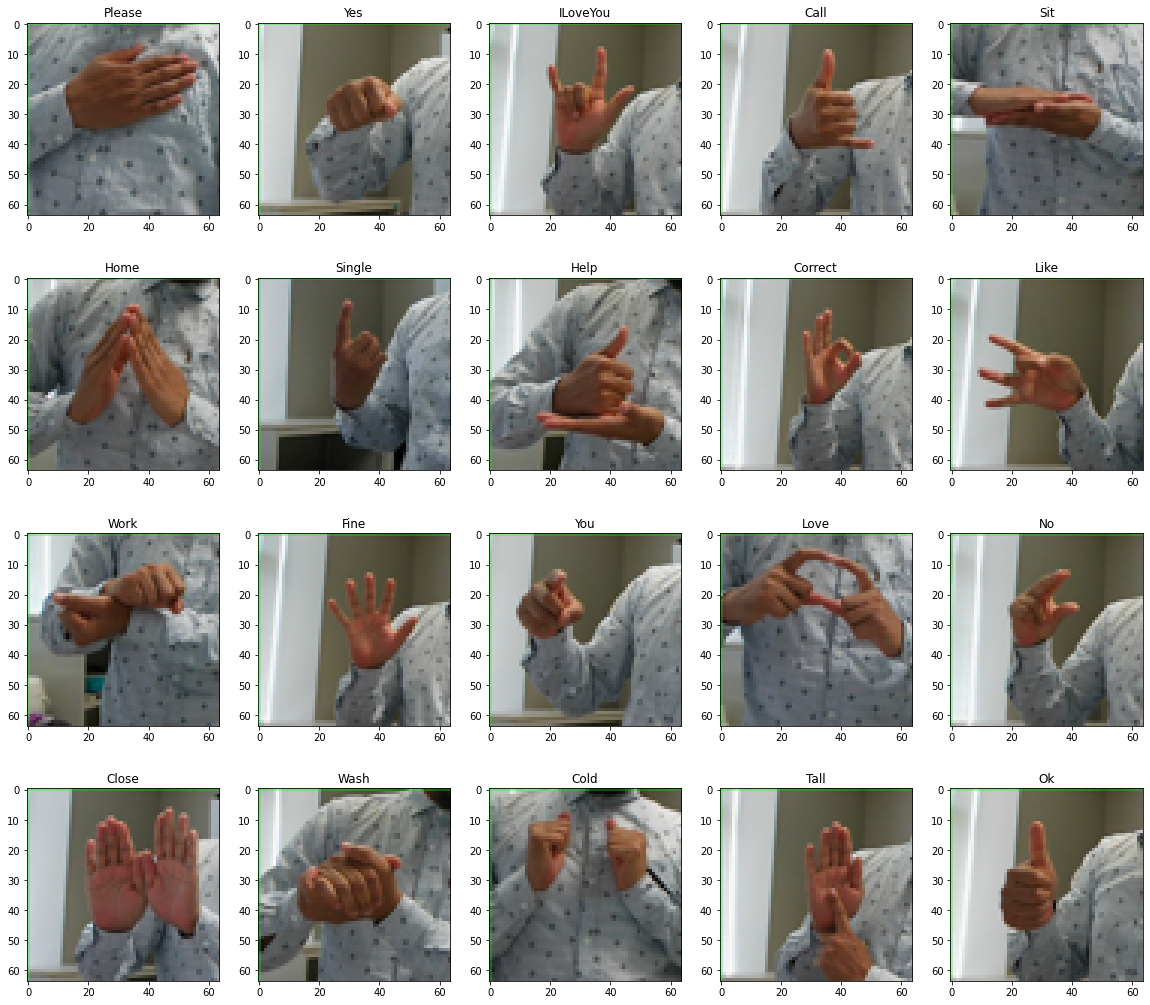

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 18))
for i in range(len(target_names)):
  ax = fig.add_subplot(4, 5, i+1)
  ax.imshow(X[y.tolist().index(i)].astype(int))
  ax.set_title(target_names[i])

#### データの正規化

In [ ]:
X /= 255

In [ ]:
from keras import backend as K
img_rows, img_cols, img_channels = X.shape[1:]
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

#### トレーニングデータとテストデータに分割

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### モデルについて

#### パラメータ

In [ ]:
batch_size = 128
num_classes = len(target_names)
epochs = 100

#### モデルの構築

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import tensorflow as tf

model =  tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adadelta",
              metrics=['accuracy'])

#### モデルの可視化

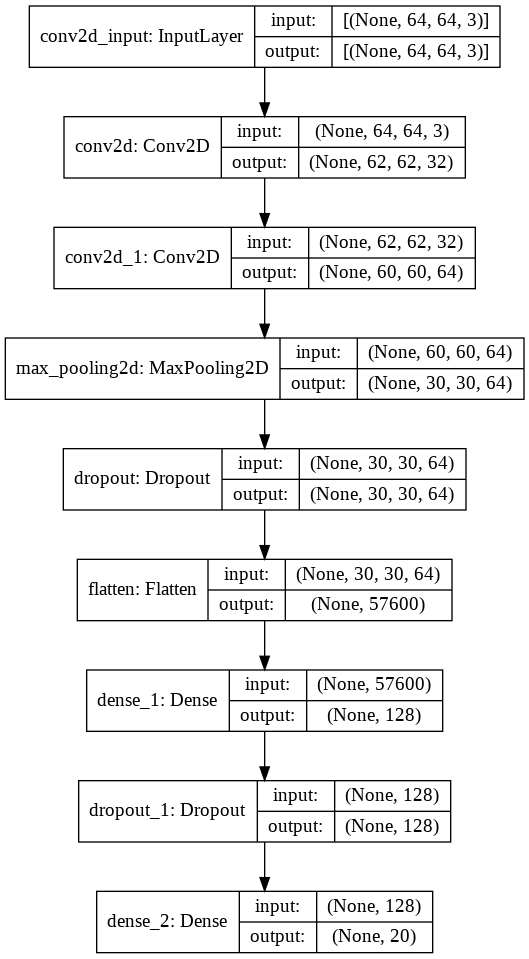

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### モデルの学習

In [ ]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/100
106/106 [==============================] - 30s 24ms/step - loss: 2.9940 - accuracy: 0.0574 - val_loss: 2.9593 - val_accuracy: 0.0569
Epoch 2/100
106/106 [==============================] - 2s 21ms/step - loss: 2.9630 - accuracy: 0.0782 - val_loss: 2.9325 - val_accuracy: 0.1411
Epoch 3/100
106/106 [==============================] - 2s 21ms/step - loss: 2.9414 - accuracy: 0.0952 - val_loss: 2.9057 - val_accuracy: 0.2102
Epoch 4/100
106/106 [==============================] - 2s 21ms/step - loss: 2.9127 - accuracy: 0.1213 - val_loss: 2.8778 - val_accuracy: 0.2229
Epoch 5/100
106/106 [==============================] - 2s 21ms/step - loss: 2.8885 - accuracy: 0.1332 - val_loss: 2.8477 - val_accuracy: 0.2669
Epoch 6/100
106/106 [==============================] - 2s 21ms/step - loss: 2.8611 - accuracy: 0.1356 - val_loss: 2.8157 - val_accuracy: 0.3002
Epoch 7/100
106/106 [==============================] - 2s 21ms/step - loss: 2.8344 - accuracy: 0.1695 - val_loss: 2.7820 - val_accuracy

### 結果について

#### テストデータに対する精度

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24182017147541046
Test accuracy: 0.9562222361564636


#### 学習過程の可視化

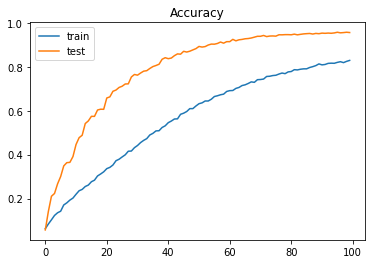

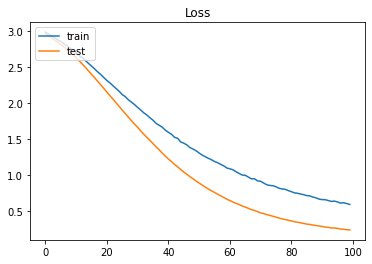

In [ ]:
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### テストデータに対する混同行列

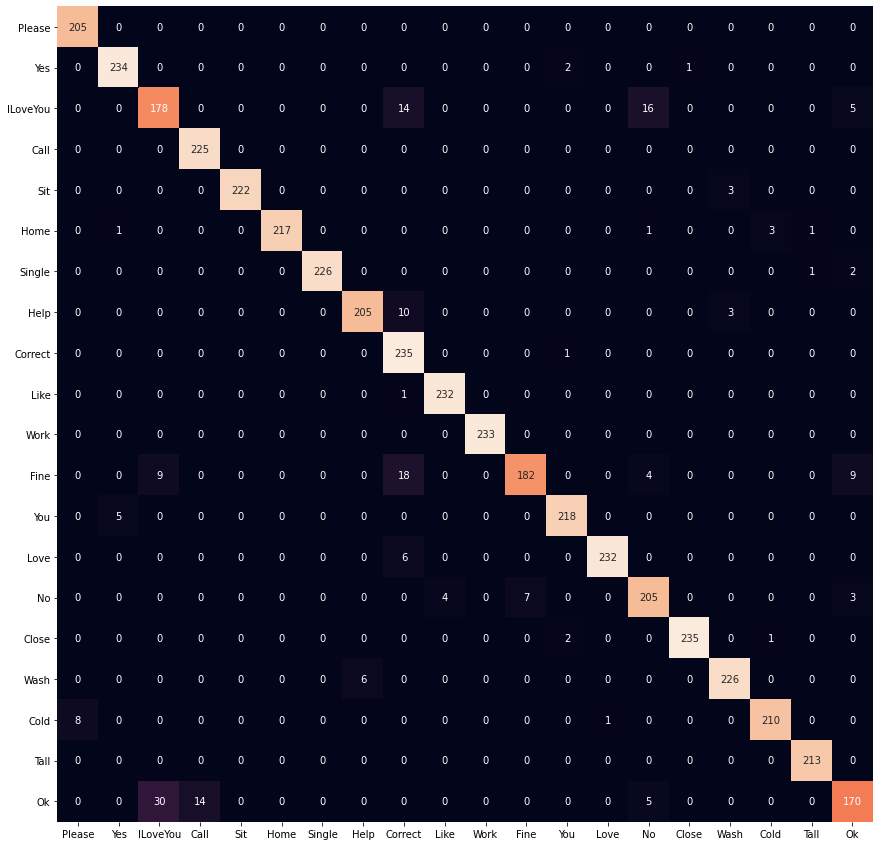

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted = np.argmax(model.predict(X_test), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=target_names, columns=target_names)
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## RNN

### About dataset

#### データの説明

ペンタブレットによって取得された文字データを使用して文字分類をします。<br>
ここで、文字データは時系列のデータになっており、ある時点でのペン先の位置情報を持っています。<br>
画像の文字データがオフライン文字というのに対して、この時系列の文字データのことをオンライン文字と呼びます。<br>
使用するデータは、HandDB_SOC_Number.zipを使います。このZIPファイルを解凍すると、HandDB_SOC_Number/<文字コード>/\<writer-id>_<文字コード>.socの形式で文字のデータが記録されており、それぞれのsocファイルは、カンマ区切りで記録されていて、1行目に特徴名を表すヘッダー、2行目以降に実際のデータが記録されています。<br>
ここではオンライン文字をLSTMを使用して分類します。


#### データの読み込み

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc" -O HandDB_SOC_Number.zip
!unzip HandDB_SOC_Number.zip

--2021-03-26 05:49:43--  https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc
Resolving drive.google.com (drive.google.com)... 74.125.20.138, 74.125.20.100, 74.125.20.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/edvhaoj7en5nfplhuihjfalqabpavt1r/1616737725000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download [following]
--2021-03-26 05:49:49--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/edvhaoj7en5nfplhuihjfalqabpavt1r/1616737725000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-10-3c-docs.googleusercontent.com (doc-10-3c-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

import csv
import os
import glob

     |████████████████████████████████| 4.1MB 7.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=d8e76706ffadf8ea4b16b56b7457fe79dabda3f81e37596e8c926cf43c7c904b
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
target_list = list(range(65296, 65306))
target_names = [chr(code) for code in target_list]
X = []
y = []
X_length = []
for i, target_dir in enumerate(target_list):
  for path in sorted(glob.glob(os.path.join("HandDB_SOC_Number", str(target_dir), "*.soc"))):
    data = []
    with open(path) as f:
      reader = csv.reader(f)
      header = next(reader)
      for row in reader:
        data.append([int(d) for d in row])
    X.append(data)
    y.append(i)
    X_length.append(len(data))

In [ ]:
max_length = max(X_length)
max_length

145

In [ ]:
def trp(l, n, padding=-1):
  return l[:n] + [[padding]*len(l[0])]*(n-len(l))

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# sequence.pad_sequences(x_train, maxlen=maxlen)
# X = np.array(list(map(lambda a: trp(a, max_length, padding=-1), X)))
X = pad_sequences(X, maxlen=max_length, padding='post', value=-1)
y = np.array(y)
X_length = np.array(X_length)

In [ ]:
mask = ~(X_length==1)
X = X[mask]
y = y[mask]
X_length = X_length[mask]

#### データを眺める

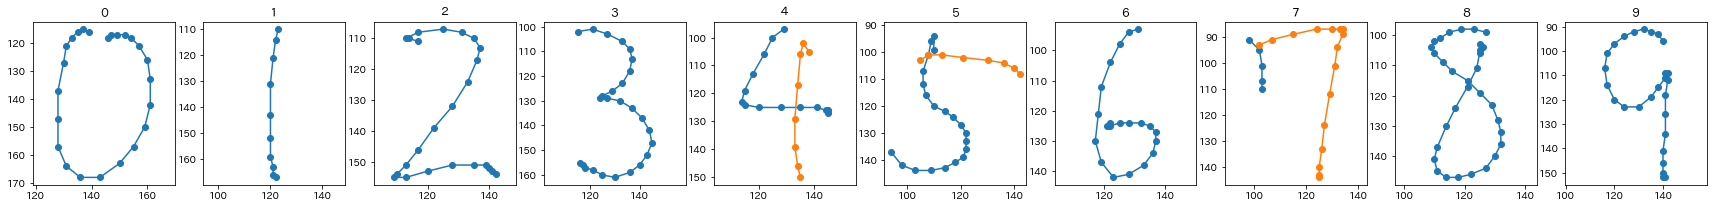

In [ ]:
fig = plt.figure(figsize=(30, 3))
for i in range(max(y)+1):
  ax = fig.add_subplot(1, 10, i+1)
  data = X[y.tolist().index(i)]
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    ax.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
  ax.set_aspect('equal', 'datalim')
  ax.invert_yaxis()
  ax.set_title(chr(target_list[i]))
plt.show()

(array([ 44.,  40.,  76., 242., 199., 197., 118.,  72.,  68.,  25.,  32.,
         21.,   6.,   8.,   4.,   2.,   4.,   2.,   5.,   2.,   2.,   2.,
          2.,   1.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([  7. ,  11.6,  16.2,  20.8,  25.4,  30. ,  34.6,  39.2,  43.8,
         48.4,  53. ,  57.6,  62.2,  66.8,  71.4,  76. ,  80.6,  85.2,
         89.8,  94.4,  99. , 103.6, 108.2, 112.8, 117.4, 122. , 126.6,
        131.2, 135.8, 140.4, 145. ]),
 <a list of 30 Patch objects>)

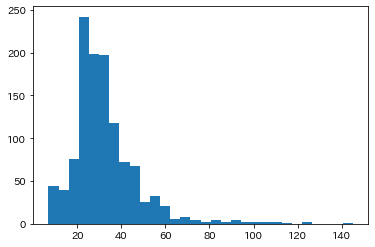

In [ ]:
# データ長の分布
plt.hist(X_length, bins=30)

#### データ分割

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, X_length_train, X_length_test = train_test_split(X, y, X_length, test_size=0.20, random_state=42)

In [ ]:
timesteps, features = X_train.shape[-2:]
num_classes = len(target_list)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 145
Features: 3
# of Classes: 10


### モデルについて

#### モデルの構築

Bidirectional LSTM<br>
https://keras.io/examples/imdb_bidirectional_lstm/<br>
Stacked LSTM<br>
https://keras.io/getting-started/sequential-model-guide/#stacked-lstm-for-sequence-classification<br>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM, Bidirectional
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=-1., input_shape=(timesteps, features)))

# Simple LSTM
# batch_size 64, epochs 100, test acc 0.94
# batch_size 128, epochs 200, test acc 0.96
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))

# Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.95
# batch_size 128, epochs 200, test acc 0.96
# model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))

# Stacking LSTM
# batch_size 64, epochs 100, test acc 0.97
# batch_size 128, epochs 200, test acc 0.97 トレーニングの精度はほぼ100%
# model.add(LSTM(128, return_sequences=True, recurrent_dropout=0.5))
# model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))

# Stacking Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.97
# model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.5)))
# model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))

# Stacking Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.97
# トレーニングのロスはとても低くなったが、テストに対しては下がらず過学習気味
# barch_size 128, epochs 200, test acc 0.96
# トレーニングのロスはとても低くなったが、テストに対しては下がらなかった
# model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.5)))
# model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))
# model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              # optimizer='adam',  # 精度が低かった
              metrics=['accuracy'])

#### モデルの可視化

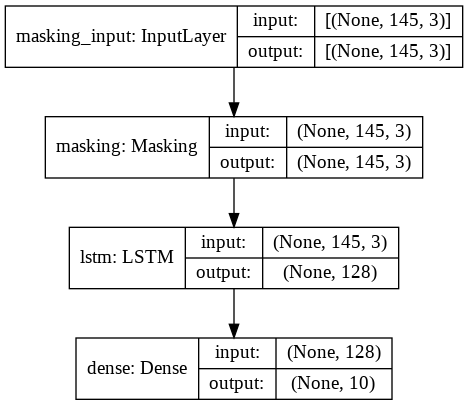

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### ハイパーパラメータ

In [ ]:
batch_size = 128
epochs = 200

#### モデル学習

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/200
8/8 [==============================] - 8s 451ms/step - loss: 2.3114 - accuracy: 0.1412 - val_loss: 1.9715 - val_accuracy: 0.3517
Epoch 2/200
8/8 [==============================] - 3s 394ms/step - loss: 1.9342 - accuracy: 0.3329 - val_loss: 1.8447 - val_accuracy: 0.3771
Epoch 3/200
8/8 [==============================] - 3s 431ms/step - loss: 1.7835 - accuracy: 0.4021 - val_loss: 1.7375 - val_accuracy: 0.4576
Epoch 4/200
8/8 [==============================] - 3s 409ms/step - loss: 1.6917 - accuracy: 0.4664 - val_loss: 1.6472 - val_accuracy: 0.4958
Epoch 5/200
8/8 [==============================] - 3s 407ms/step - loss: 1.6322 - accuracy: 0.4849 - val_loss: 1.5736 - val_accuracy: 0.4788
Epoch 6/200
8/8 [==============================] - 3s 403ms/step - loss: 1.5248 - accuracy: 0.5134 - val_loss: 1.5098 - val_accuracy: 0.5127
Epoch 7/200
8/8 [==============================] - 3s 405ms/step - loss: 1.4382 - accuracy: 0.5570 - val_loss: 1.4469 - val_accuracy: 0.5212
Epoch 8/200
8

### 結果について

#### テストデータに対する評価

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15592113137245178
Test accuracy: 0.9618644118309021


#### 学習過程を可視化

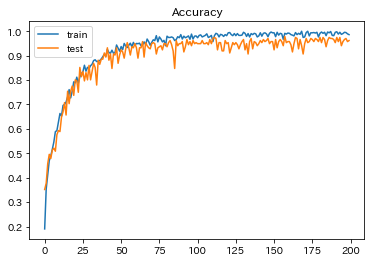

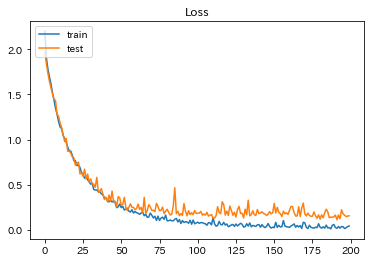

In [ ]:
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### テストデータに対する混同行列

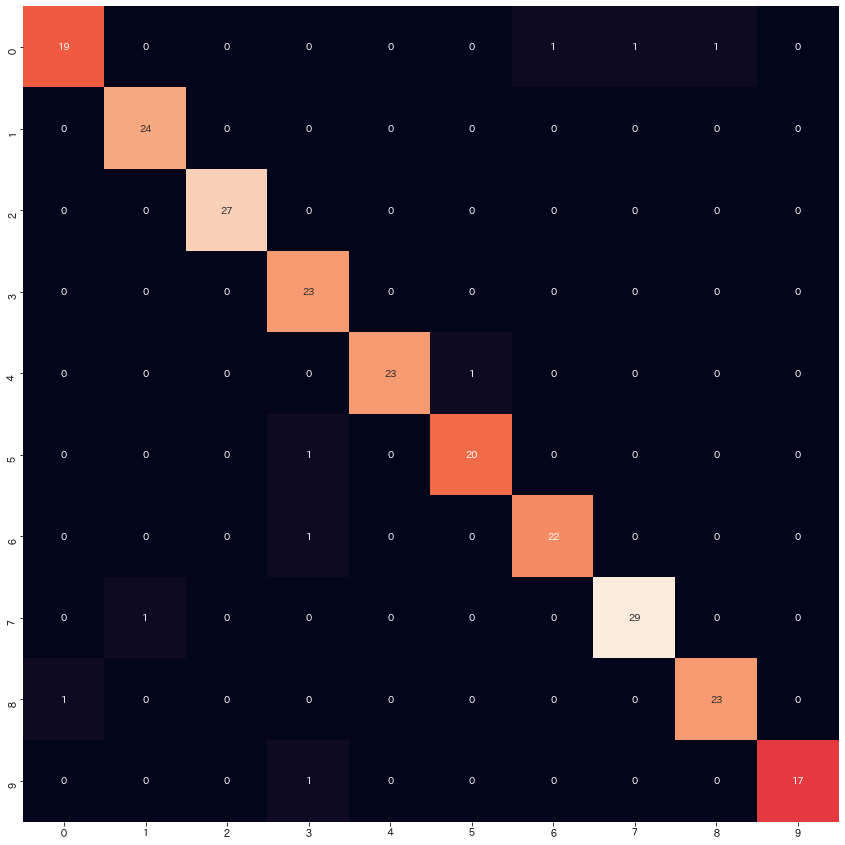

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted = np.argmax(model.predict(X_test), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=target_names, columns=target_names)
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

#### 間違ったデータを可視化

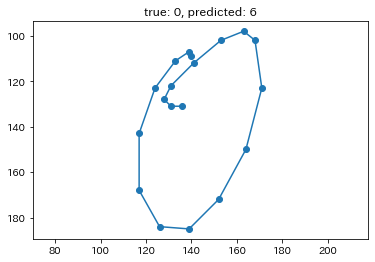

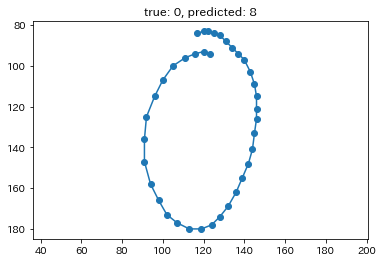

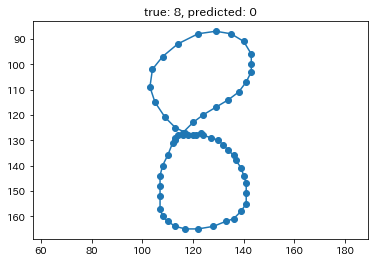

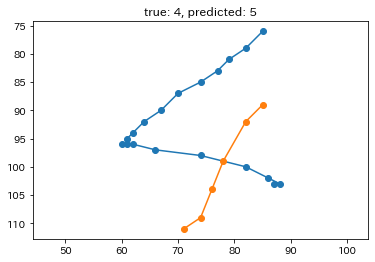

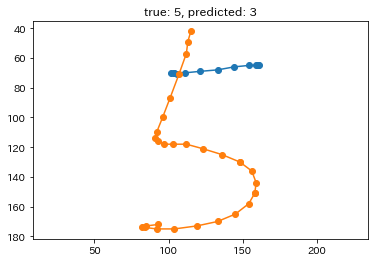

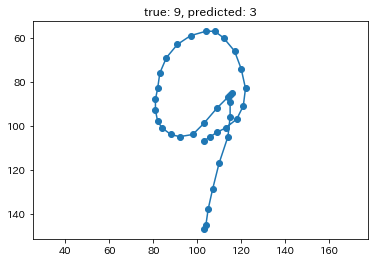

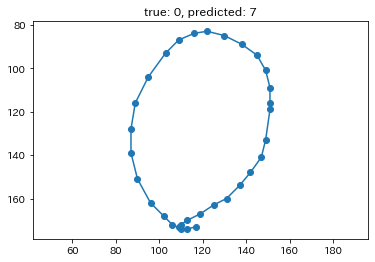

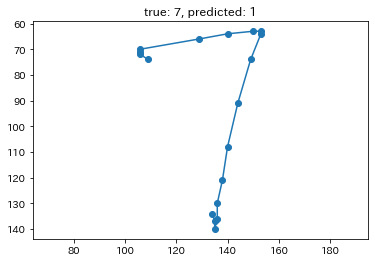

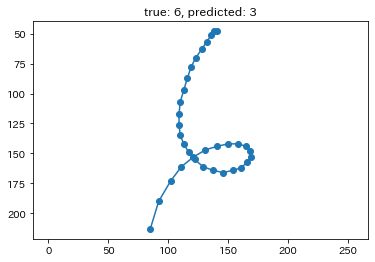

In [ ]:
mask = y_test != predicted
for data, label, pred, length in zip(X_test[mask], y_test[mask], predicted[mask], X_length_test[mask]):
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    plt.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
  plt.gca().set_aspect('equal', 'datalim')
  plt.gca().invert_yaxis()
  plt.title(f"true: {label}, predicted: {pred}")
  plt.show()

## CNN + RNN

### データについて

#### データの説明

ペンタブレットによって取得された文字データを使用して文字分類をします。<br>
ここで文字データは時系列のデータになっており、ある時点でのペン先の位置情報を持っています。<br>
画像の文字データがオフライン文字というのに対して、この時系列の文字データのことをオンライン文字と呼びます。<br>
使用するデータは、HandDB_SOC_Number.zipを使います。このZIPファイルを解凍すると、HandDB_SOC_Number/<文字コード>/\<writer-id>_<文字コード>.socの形式で文字のデータが記録されており、それぞれのsocファイルは、カンマ区切りで記録されていて、1行目に特徴名を表すヘッダー、2行目以降に実際のデータが記録されています。<br>
ここでは、オンライン文字をオフライン文字に変換し、オンライン文字はLSTM、オフライン文字はCNNを使用し特徴を抽出し、途中でLSTMとCNNを結合したモデルを作成します。

#### データの読み込み

In [ ]:
aa!wget "https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc" -O HandDB_SOC_Number.zip
!unzip HandDB_SOC_Number.zip

--2021-03-26 06:11:54--  https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc
Resolving drive.google.com (drive.google.com)... 74.125.195.102, 74.125.195.139, 74.125.195.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/11r86m5q1mqp61ugg2mk9eg7hv8rlfgl/1616739075000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download [following]
--2021-03-26 06:12:00--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/11r86m5q1mqp61ugg2mk9eg7hv8rlfgl/1616739075000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-10-3c-docs.googleusercontent.com (doc-10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

import csv
import os
import glob

In [ ]:
target_list = list(range(65296, 65306))
target_names = [chr(code) for code in target_list]
X = []
y = []
X_length = []
for i, target_dir in enumerate(target_list):
  for path in sorted(glob.glob(os.path.join("HandDB_SOC_Number", str(target_dir), "*.soc"))):
    data = []
    with open(path) as f:
      reader = csv.reader(f)
      header = next(reader)
      for row in reader:
        data.append([int(d) for d in row])
    X.append(data)
    y.append(i)
    X_length.append(len(data))

In [ ]:
max_length = max(X_length)
max_length

145

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
X = pad_sequences(X, maxlen=max_length, value=-1, padding="post")
y = np.array(y)
X_length = np.array(X_length)

In [ ]:
timesteps, features = X.shape[-2:]
num_classes = len(target_list)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 145
Features: 3
# of Classes: 10


#### 画像データ作成

In [ ]:
import io
import cv2

In [ ]:
def get_img_from_fig(fig, dpi=64):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = 255 - img
    return img

In [ ]:
def get_img_from_data(data, dpi=64, linewidth=3):
  fig = plt.figure(figsize=(1, 1))
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    plt.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, color="black", linewidth=linewidth)
  plt.gca().set_aspect('equal', 'datalim')
  plt.gca().invert_yaxis()
  plt.axis('off')
  img = get_img_from_fig(fig, dpi)
  plt.close()
  return img

In [ ]:
X_images = np.array([get_img_from_data(a, dpi=32, linewidth=3) for a in X], dtype=np.float64)

In [ ]:
img_rows, img_cols = X_images.shape[1:]
img_channels = 1
print("row:", img_rows)
print("col:", img_cols)

row: 32
col: 32


#### データを眺める

Text(0.5, 0.98, 'label: 9')

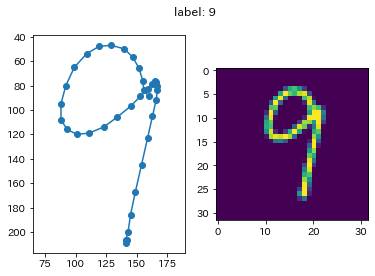

In [ ]:
index = 1100
fig, (axL, axR) = plt.subplots(ncols=2)
data = X[index]
n_stroke = data[:, 0].max()
for i_stroke in range(n_stroke+1):
  axL.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
axL.set_aspect('equal', 'datalim')
axL.invert_yaxis()
axR.imshow(X_images[index].reshape(img_rows, img_cols))
fig.suptitle(f"label: {y[index]}")

#### 画像データの正規化

In [ ]:
X_images /= 255

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_images = X_images.reshape(X_images.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X_images = X_images.reshape(X_images.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

#### データ分割

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, X_img_train, X_img_test, y_train, y_test, X_length_train, X_length_test = train_test_split(X, X_images, y, X_length, test_size=0.20, random_state=42)

### CNNについて

#### モデル作成

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

#### ハイパーパラメータ

In [ ]:
batch_size = 128
epochs = 12

#### モデルの学習

In [ ]:
model.fit(X_img_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_img_test, y_test))

Epoch 1/12
8/8 [==============================] - 28s 38ms/step - loss: 1.9718 - accuracy: 0.3264 - val_loss: 0.7371 - val_accuracy: 0.8220
Epoch 2/12
8/8 [==============================] - 0s 10ms/step - loss: 0.6498 - accuracy: 0.8082 - val_loss: 0.3570 - val_accuracy: 0.8983
Epoch 3/12
8/8 [==============================] - 0s 10ms/step - loss: 0.3318 - accuracy: 0.8972 - val_loss: 0.2572 - val_accuracy: 0.9280
Epoch 4/12
8/8 [==============================] - 0s 9ms/step - loss: 0.2314 - accuracy: 0.9243 - val_loss: 0.2240 - val_accuracy: 0.9407
Epoch 5/12
8/8 [==============================] - 0s 9ms/step - loss: 0.1841 - accuracy: 0.9454 - val_loss: 0.2187 - val_accuracy: 0.9322
Epoch 6/12
8/8 [==============================] - 0s 9ms/step - loss: 0.1696 - accuracy: 0.9506 - val_loss: 0.1993 - val_accuracy: 0.9534
Epoch 7/12
8/8 [==============================] - 0s 10ms/step - loss: 0.1383 - accuracy: 0.9647 - val_loss: 0.2074 - val_accuracy: 0.9492
Epoch 8/12
8/8 [=============

### RNNについて

#### モデルの作成

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM, Bidirectional

model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=-1., input_shape=(timesteps, features)))
# Simple LSTM
# batch_size 64, epochs 100, test acc 0.94
# batch_size 128, epochs 200, test acc 0.96
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.95
# batch_size 128, epochs 200, test acc 0.96
# model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))
# Stacking LSTM
# batch_size 64, epochs 100, test acc 0.97
# batch_size 128, epochs 200, test acc 0.97 トレーニングの精度はほぼ100%
# model.add(LSTM(128, return_sequences=True, recurrent_dropout=0.5))
# model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# Stacking Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.97
# model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.5)))
# model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# Stacking Bidirectional LSTM
# batch_size 64, epochs 100, test acc 0.97
# トレーニングのロスはとても低くなったが、テストに対しては下がらず過学習気味
# barch_size 128, epochs 200, test acc 0.96
# トレーニングのロスはとても低くなったが、テストに対しては下がらなかった
# model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.5)))
# model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))
# model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              # optimizer='adam',  # 精度が低かった
              metrics=['accuracy'])

#### ハイパーパラメータ

In [ ]:
batch_size = 128
epochs = 200

#### モデル学習

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/200
8/8 [==============================] - 5s 448ms/step - loss: 2.2858 - accuracy: 0.1448 - val_loss: 1.9803 - val_accuracy: 0.3559
Epoch 2/200
8/8 [==============================] - 3s 409ms/step - loss: 1.9512 - accuracy: 0.3742 - val_loss: 1.8106 - val_accuracy: 0.4364
Epoch 3/200
8/8 [==============================] - 3s 411ms/step - loss: 1.7644 - accuracy: 0.4625 - val_loss: 1.7069 - val_accuracy: 0.4025
Epoch 4/200
8/8 [==============================] - 3s 417ms/step - loss: 1.6809 - accuracy: 0.4746 - val_loss: 1.6033 - val_accuracy: 0.4364
Epoch 5/200
8/8 [==============================] - 3s 410ms/step - loss: 1.5601 - accuracy: 0.5212 - val_loss: 1.5392 - val_accuracy: 0.4873
Epoch 6/200
8/8 [==============================] - 3s 398ms/step - loss: 1.4674 - accuracy: 0.5621 - val_loss: 1.4822 - val_accuracy: 0.5212
Epoch 7/200
8/8 [==============================] - 3s 403ms/step - loss: 1.4059 - accuracy: 0.5633 - val_loss: 1.3597 - val_accuracy: 0.5847
Epoch 8/200
8

### CNN + RNNについて

#### モデルの構築

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Embedding, Masking
from keras.layers import concatenate
from keras.layers import LSTM, Bidirectional
from keras.optimizers import Adadelta
import tensorflow as tf

cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Masking(mask_value=-1., input_shape=(timesteps, features)))
# Simple LSTM
lstm_model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# Bidirectional LSTM
# lstm_model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.5)))
# Stacking LSTM
# lstm_model.add(LSTM(128, return_sequences=True, recurrent_dropout=0.5))
# lstm_model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))
# model.add(Dense(num_classes, activation='softmax'))

merged = tf.keras.layers.concatenate([cnn_model.output, lstm_model.output])
merged_model = tf.keras.layers.Dropout(0.5)(merged)
merged_model = tf.keras.layers.Dense(num_classes, activation="softmax")(merged_model)

model = tf.keras.Model([cnn_model.input, lstm_model.input], merged_model)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              # optimizer='rmsprop',
              metrics=['accuracy'])

#### モデルの可視化

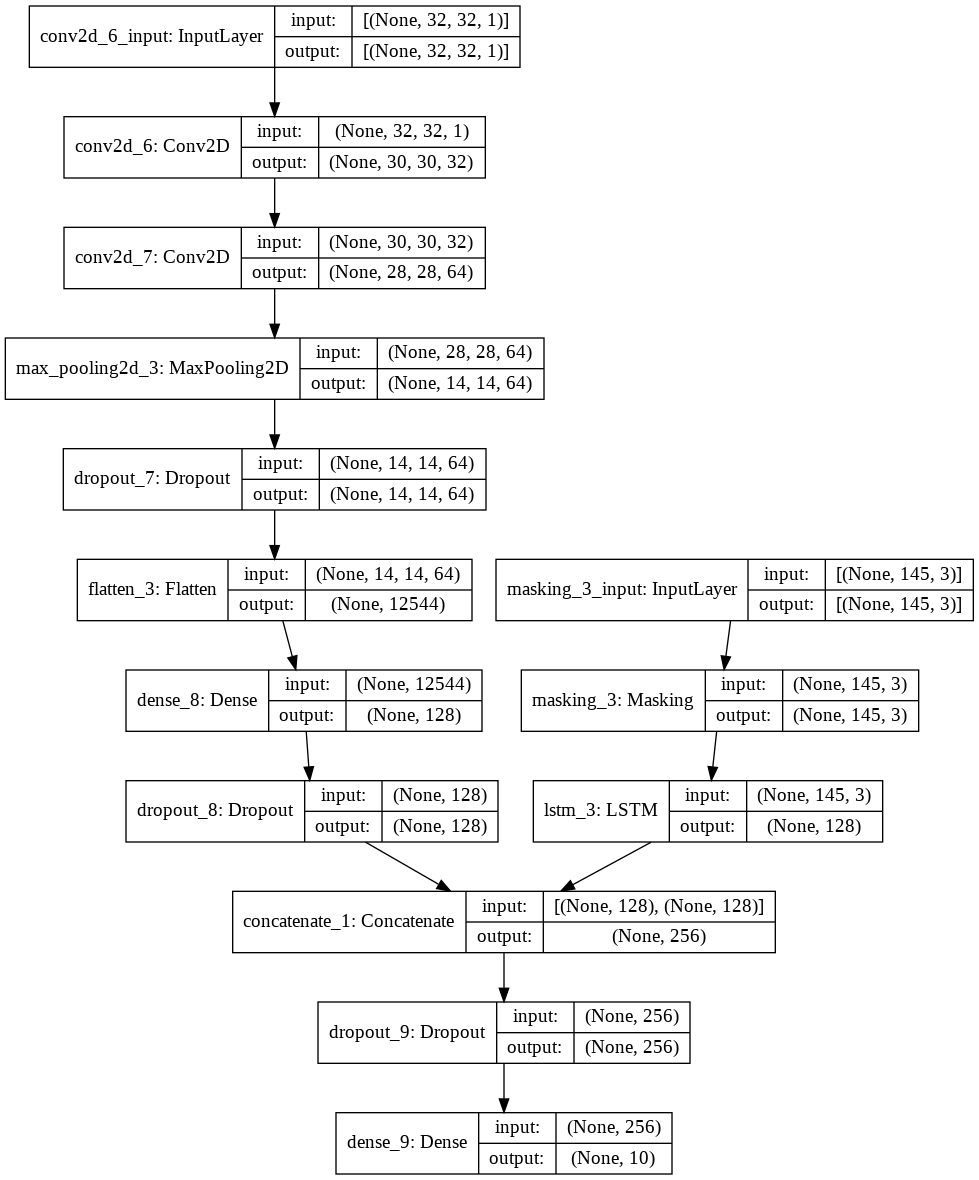

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### ハイパーパラメータ

In [ ]:
batch_size = 128
epochs = 25

#### モデルの学習

In [ ]:
hist = model.fit([X_img_train, X_train], y_train, batch_size=batch_size, epochs=epochs, validation_data=([X_img_test, X_test], y_test))

Epoch 1/25
8/8 [==============================] - 6s 445ms/step - loss: 2.2126 - accuracy: 0.1999 - val_loss: 1.0561 - val_accuracy: 0.8517
Epoch 2/25
8/8 [==============================] - 3s 392ms/step - loss: 1.2208 - accuracy: 0.6124 - val_loss: 0.4709 - val_accuracy: 0.8898
Epoch 3/25
8/8 [==============================] - 3s 378ms/step - loss: 0.6435 - accuracy: 0.7978 - val_loss: 0.3075 - val_accuracy: 0.9068
Epoch 4/25
8/8 [==============================] - 3s 396ms/step - loss: 0.5204 - accuracy: 0.8182 - val_loss: 0.2553 - val_accuracy: 0.9280
Epoch 5/25
8/8 [==============================] - 3s 413ms/step - loss: 0.4080 - accuracy: 0.8648 - val_loss: 0.2089 - val_accuracy: 0.9364
Epoch 6/25
8/8 [==============================] - 3s 412ms/step - loss: 0.3956 - accuracy: 0.8568 - val_loss: 0.1875 - val_accuracy: 0.9492
Epoch 7/25
8/8 [==============================] - 3s 401ms/step - loss: 0.3228 - accuracy: 0.8986 - val_loss: 0.1524 - val_accuracy: 0.9619
Epoch 8/25
8/8 [====

### 結果について

#### テストデータに対する評価

In [ ]:
score = model.evaluate([X_img_test, X_test], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10784849524497986
Test accuracy: 0.9745762944221497


#### 学習過程を可視化

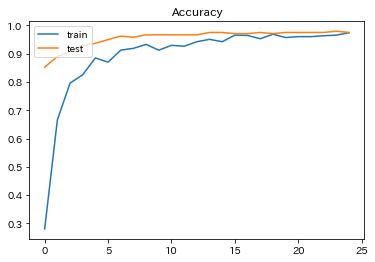

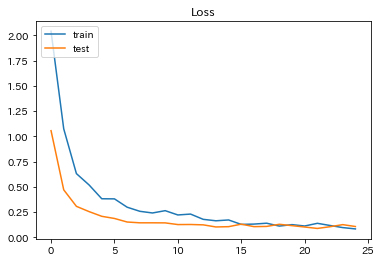

In [ ]:
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### テストデータに対する混同行列

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


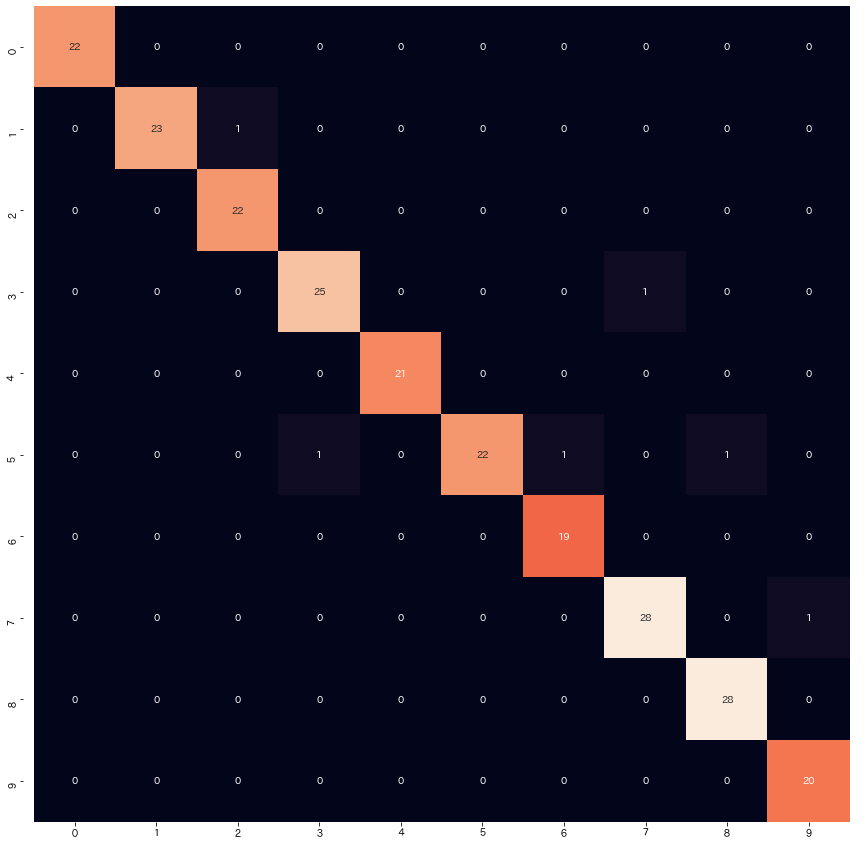

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted = np.argmax(model.predict([X_img_test, X_test]), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=target_names, columns=target_names)
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, fmt="d")
plt.axes().set_aspect('equal', 'datalim')

#### 間違ったデータを可視化

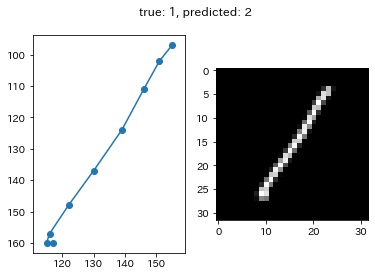

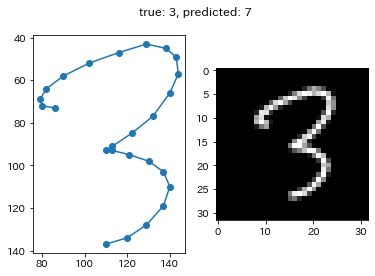

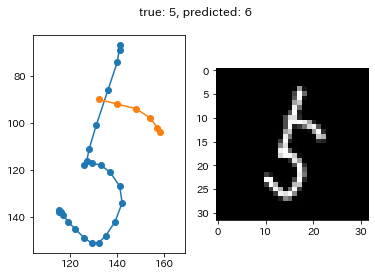

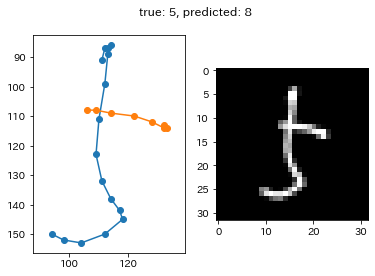

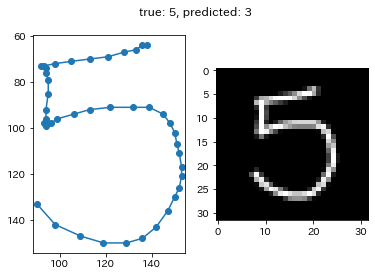

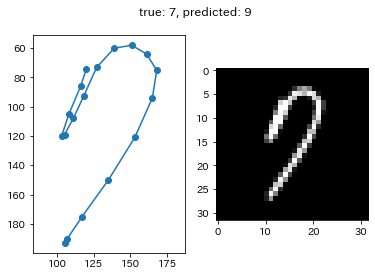

In [ ]:
mask = y_test != predicted
for img, data, label, pred, length in zip(X_img_test[mask], X_test[mask], y_test[mask], predicted[mask], X_length_test[mask]):
  fig, (axL, axR) = plt.subplots(ncols=2)
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    axL.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
  axL.set_aspect('equal', 'datalim')
  axL.invert_yaxis()
  axR.imshow(img.reshape(img.shape[0], img.shape[1]), cmap="gray")
  fig.suptitle(f"true: {label}, predicted: {pred}")
  plt.show()

## FFT + CNN

SVC2004の署名データを使用し、筆者認証(Signature Verification)をする。<br>
ここで、使用するデータは、オンライン文字データをスペクトログラムの画像データに変換し使用する。<br>
筆者認証では、ユーザーごとにモデルを作成し、本人か他人かの2値分類をする。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
import glob

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

### データについて

#### SVC2004の説明

This data set contains signature data collected from
40 users.  For each user, there are 20 genuine signatures and
20 skilled forgeries.

Each genuine/forgery signature is stored in a separate text file.
The file names are in the format "UxSy.txt", where x (1..40)
indicates the user and y (1..40) indicates one signature instance
of the corresponding user, with the first 20 (1..20) representing
genuine signatures and the rest (21..40) representing skilled
forgeries provided by the other users.

In each text file, the signature is simply represented as a
sequence of points.  The first line store the feature name.  Each of the
subsequent lines corresponds to one point characterized by 5
features listed in the following order:

  * Stroke Number - current stroke number (if -1, pen-up state)
  * X-coordinate  - scaled cursor position along the x-axis
  * Y-coordinate  - scaled cursor position along the y-axis
  * Time stamp    - system time at which the event was posted
  * Button status - current button status (0 for pen-up and 1 for pen-down)

#### データのダウンロード

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1k9E23KYCMELX38WCkGPtwwWb1s855xpD" -O SVC2004_SOC.zip
!unzip SVC2004_SOC.zip

--2021-03-26 06:28:43--  https://drive.google.com/uc?export=download&id=1k9E23KYCMELX38WCkGPtwwWb1s855xpD
Resolving drive.google.com (drive.google.com)... 74.125.195.138, 74.125.195.101, 74.125.195.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1qeiksn39kc9vd71a685pmimin3a2hc8/1616740125000/12360162376384578551/*/1k9E23KYCMELX38WCkGPtwwWb1s855xpD?e=download [following]
--2021-03-26 06:28:56--  https://doc-0s-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1qeiksn39kc9vd71a685pmimin3a2hc8/1616740125000/12360162376384578551/*/1k9E23KYCMELX38WCkGPtwwWb1s855xpD?e=download
Resolving doc-0s-3c-docs.googleusercontent.com (doc-0s-3c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0s-3c-docs.googleusercontent.com (doc-0s

#### データの読み込み

データはTask1のみ使用します。

In [ ]:
files = glob.glob(os.path.join("SVC2004_SOC", "Task1", "*.soc"))
files = sorted(files, key = lambda x: [int(i) for i in re.fullmatch('^U(\d+)S(\d+).soc$', os.path.basename(x)).groups()])
X = []
user = []
genuine = []
X_length = []
for file_path in files:
  try:
    data = pd.read_csv(file_path)
    data = data.loc[data["stroke_num"]>=0]
    data.loc[:, "time"] -= data.iloc[0].loc["time"]
    u_g = [int(i) for i in re.fullmatch('^U(\d+)S(\d+).soc$', os.path.basename(file_path)).groups()]
    X.append(data.loc[:, ["stroke_num", "x", "y", "time"]].values)
    user.append(u_g[0])
    genuine.append(1 if u_g[1] < 21 else 0)
    X_length.append(len(data))
  except Exception as e:
    print(e, file_path)
    print(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
max_length = max(X_length)
num_user = max(user)

In [ ]:
user = np.array(user)
genuine = np.array(genuine)
X_length = np.array(X_length)

#### スペクトログラムの作成

書字速度を短時間フーリエ変換して、スペクトログラムを作成する。<br>
書字速度は、横軸に対する速度と縦軸に対する速度と平面上での速度の3つを使用し、それぞれに短時間フーリエ変換を適応し、スペクトログラムのRGB画像を取得する。

##### 速度や周波数を取得するための関数の準備

In [ ]:
# 周波数を取得するための関数
def get_freq(data):
  N = len(data)
  freq = np.fft.fft(data)
  return np.abs(freq)[1:int(N/2+0.5)]

In [ ]:
# それぞれの速度と時間の変化を取得する関数
def get_velocity(data):
  num_index = max(data[:, 0])
  x_vel = []
  y_vel = []
  xy_vel = []
  t_diff = []
  for i in range(num_index+1):
    stroke_data = data[data[:, 0]==i]
    if len(stroke_data) == 1:
      x_vel.append(0)
      y_vel.append(0)
      xy_vel.append(0)
      t_diff.append(0.01)
    else:
      time_diff = np.ediff1d(stroke_data[:, 3]*0.001)
      time_diff = np.append([time_diff.mean()], time_diff)
      stroke_data = stroke_data[time_diff!=0]
      time_diff = time_diff[time_diff!=0]
      x_diff = np.ediff1d(stroke_data[:, 1], to_begin=0) / time_diff
      y_diff = np.ediff1d(stroke_data[:, 2], to_begin=0) / time_diff
      diff = np.array([np.linalg.norm(stroke_data[i] - stroke_data[i-1]) for i in range(1, len(stroke_data))])
      diff = np.append([0], diff) / time_diff
      x_vel.extend(x_diff)
      y_vel.extend(y_diff)
      xy_vel.extend(diff)
      t_diff.extend(time_diff)
  return np.array(x_vel), np.array(y_vel), np.array(xy_vel), np.array(t_diff)

##### スペクトログラムの抽出

In [ ]:
def get_velocity_sft(data, n_window=50):
  x_vel, y_vel, xy_vel, t_diff = get_velocity(data)
  dt = np.mean(t_diff)
  d_len = len(t_diff)
  amps = []
  for i in range(n_window, d_len):
    vel_tmp = xy_vel[i-n_window:i]
    amp = np.array([get_freq(x_vel[i-n_window:i]), get_freq(y_vel[i-n_window:i]), get_freq(xy_vel[i-n_window:i])]).T
    amps.append(amp)
  freq = np.fft.fftfreq(n_window, dt)[1:int(n_window/2+0.5)]
  return np.array(amps), freq

In [ ]:
X_freqs = []
n_window=50
for data in X:
  spectrogram, freq = get_velocity_sft(data, n_window=n_window)
  X_freqs.append(spectrogram)

#### データを眺める

In [ ]:
def plot_character(data):
  n_stroke = max(data[:, 0]) + 1
  for i in range(n_stroke):
    stroke = data[data[:, 0]==i]
    plt.plot(stroke[:, 1], stroke[:, 2], marker="o")

In [ ]:
def plot_spectrogram(spectrogram, figsize=(15, 5), dpi=100):
  spectrogram = (spectrogram - spectrogram.min())/(spectrogram.max()-spectrogram.min())
  plt.figure(figsize=figsize, dpi=dpi)
  plt.imshow(spectrogram.transpose(1, 0, 2))
  plt.xlabel("time [mS]")
  plt.ylabel("frequency [Hz]")
  plt.gca().invert_yaxis()

データ長: 198
窓のサイズ: 50


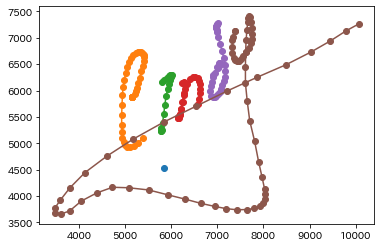

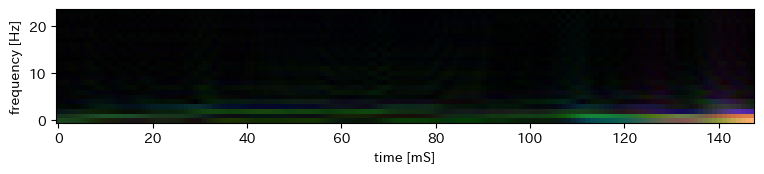

In [ ]:
index = 1520
print("データ長:", X_length[index])
print("窓のサイズ:", n_window)
plot_character(X[index])
plot_spectrogram(X_freqs[index], figsize=(50, 1.5), dpi=100)

#### データの0埋めと標準化

In [ ]:
X_freqs = pad_sequences(X_freqs, padding='post', value=0)
# X_freqs[X_freqs<0] = 0
X_freqs = (X_freqs - X_freqs.min())/(X_freqs.max()-X_freqs.min())

In [ ]:
img_rows, img_cols, img_channels = X_freqs.shape[1:]

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_freqs = X_freqs.reshape(X_freqs.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X_freqs = X_freqs.reshape(X_freqs.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

### 必要な関数

#### kerasをリセットするための関数

ユーザーごとにモデルを作成すると、多数のモデルが作成されメモリが不足する可能性があるので、1人のユーザーに対して学習と評価が終わったら、モデルを消去しkerasをリセットする。そのための関数。

In [ ]:
import gc
from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session
import tensorflow

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    # print(gc.collect()) # if it's done something you should see a number being outputted
    gc.collect()

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

ModuleNotFoundError: ignored

#### EER (Equal Error Rate) を取得するための関数

精度の評価に使用するEERの関数を作成する。<br>
EERとは、FARとFRRが一致するように閾値を事後的に調整した際のエラー率です。 EERは認証技術の精度性能の目安とされることが多く、小さいほど精度が高くなります。(https://www.mofiria.com/biometrics-and-security-blog/biometrics/biometrics-terminology/)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def get_eer(y_true, y_score):
  fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
  fnr = 1 - tpr
  eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
  EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
  return EER

### モデルについて

#### モデルの構築

In [ ]:
input_shape = X_freqs.shape[1:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Masking
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
import tensorflow as tf

def build_model(input_shape):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                  activation='relu'))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                # optimizer=Adadelta(),
                optimizer='adam',
                metrics=['accuracy'])
  return model

#### ハイパーパラメータ

In [ ]:
batch_size = 5
epochs = 20

#### モデルの学習

In [ ]:
train_EER_list = []
test_EER_list = []
test_size = 0.2
for user_index in range(1, num_user+1):
  print("user_index:", user_index)
  mask = user == user_index
  X_train, X_test, y_train, y_test = train_test_split(X_freqs[mask], genuine[mask], test_size=test_size, random_state=7, shuffle=True, stratify=genuine[mask])
  model = build_model(input_shape=input_shape)
  model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_eer = get_eer(y_train, pred_train)
  test_eer = get_eer(y_test, pred_test)
  print("train EER(%):", train_eer*100)
  print("test EER(%):", test_eer*100)
  train_EER_list.append(train_eer*100)
  test_EER_list.append(test_eer*100)
  del model
  #reset_keras()
  #gc.collect()
  print()

user_index: 1
Epoch 1/20
7/7 [==============================] - 1s 45ms/step - loss: 0.6398 - accuracy: 0.6350 - val_loss: 0.2213 - val_accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1614 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0657 - accuracy: 0.9565 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 0s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 2.2827e-04 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.6642e-05 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 0s 17ms/step - loss: 8.4872e-04 - accuracy: 1.0000 - val_loss: 6.9184e-06 - val_accuracy: 1.00

### 結果について

#### 精度の評価

In [ ]:
print("Average Train EER(%):", np.mean(train_EER_list))
print("Average Test EER(%):", np.mean(test_EER_list))

Average Train EER(%): 0.0
Average Test EER(%): 3.75


# 課題

## CNN
小文字のアルファベット画像を多クラス分類する。<br>
モデルの作成などを適切に埋めて実行し、結果を確かめよ。<br>
必要なライブラリは適宜読み込んで使用すること。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os
import io
import glob

### データについて

#### データの説明

HandDB_Lower_Alphabet.npzには、小文字のaからzまでが画像とその正解ラベルが記録してある。<br>
この画像は、オンライン文字から作成されており、32x32の大きさで記録してある。

#### データのロード

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ" -O HandDB_Lower_Alphabet.npz

--2021-03-26 06:36:43--  https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.113, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/osac5as2p8benake2inn4qton0umv6dg/1616740575000/12360162376384578551/*/1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ?e=download [following]
--2021-03-26 06:36:44--  https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/osac5as2p8benake2inn4qton0umv6dg/1616740575000/12360162376384578551/*/1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ?e=download
Resolving doc-14-3c-docs.googleusercontent.com (doc-14-3c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-14-3c-docs.googleusercontent.com (doc-14

In [ ]:
data = np.load('HandDB_Lower_Alphabet.npz', allow_pickle=True)
X = data['x']
y = data['y']
n2c = data['n2c'].item()

#### データを眺める

ターゲットの数: 26


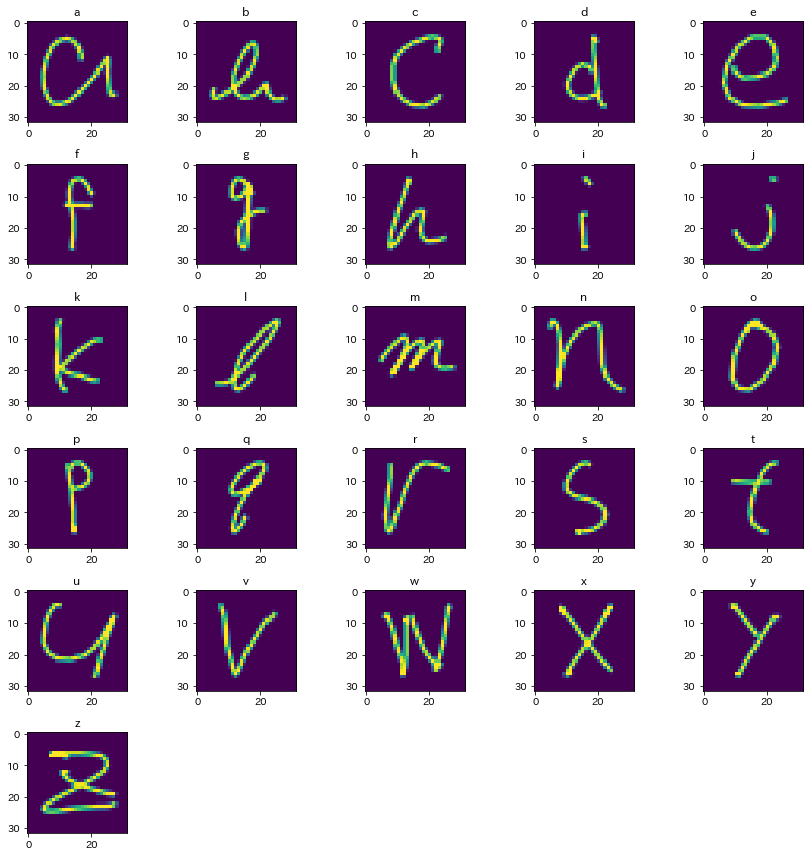

In [ ]:
n_target = max(y)+1
print("ターゲットの数:", n_target)
fig = plt.figure(figsize=(12, 12))
for i in range(n_target):
  ax = fig.add_subplot(6, 5, i+1)
  ax.imshow(X[y.tolist().index(i)].reshape(X.shape[1], X.shape[2]))
  ax.set_title(n2c[i])
plt.tight_layout()

#### データの正規化

In [ ]:
X /= 255

In [ ]:
from keras import backend as K
img_rows, img_cols, img_channels = X.shape[1:]
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

#### トレーニングデータとテストデータに分割

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### モデルについて

#### パラメータ
* パラメータを自分で調整して、変化を確認せよ

In [ ]:
batch_size = ?
num_classes = ?
epochs = ?

SyntaxError: ignored

#### モデルの構築
* CNNのモデルを作成せよ。レイヤーを変えたときの変化を確認せよ。
* compile時のLossとOptimizerによる変化を確認せよ。

In [ ]:
model = ?

model.compile(loss=?,
              optimizer=?,
              ?)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




#### モデルの可視化

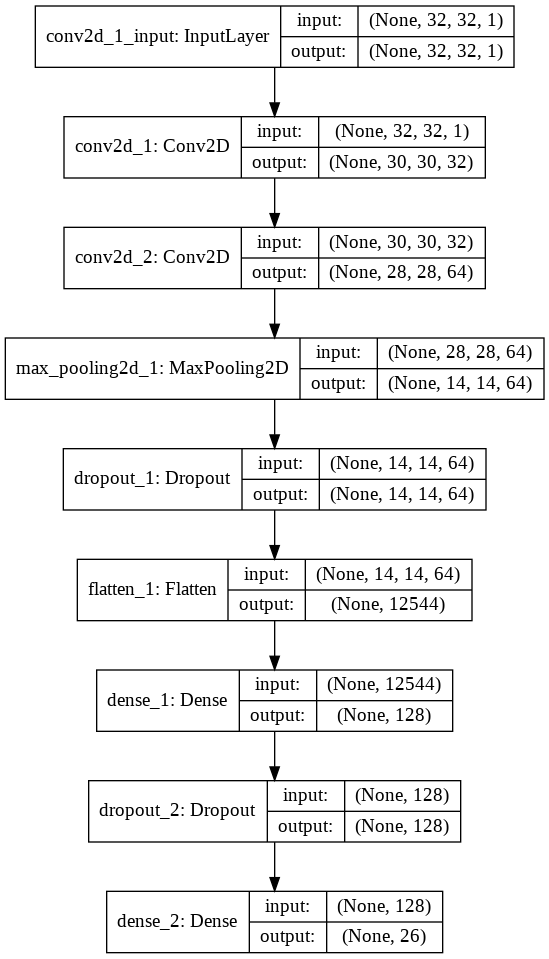

In [ ]:
from keras.utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### モデルの学習

In [ ]:
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2300 samples, validate on 767 samples
Epoch 1/25





2300/2300 [==============================] - 8s 3ms/step - loss: 2.8274 - acc: 0.2091 - val_loss: 1.9631 - val_acc: 0.4589
Epoch 2/25
2300/2300 [==============================] - 0s 57us/step - loss: 1.8106 - acc: 0.4678 - val_loss: 1.1608 - val_acc: 0.6910
Epoch 3/25
2300/2300 [==============================] - 0s 55us/step - loss: 1.2601 - acc: 0.6352 - val_loss: 0.7877 - val_acc: 0.7849
Epoch 4/25
2300/2300 [==============================] - 0s 56us/step - loss: 1.0079 - acc: 0.7126 - val_loss: 0.6581 - val_acc: 0.8279
Epoch 5/25
2300/2300 [==============================] - 0s 56us/step - loss: 0.8674 - acc: 0.7535 - val_loss: 0.6115 - val_acc: 0.8396
Epoch 6/25
2300/2300 [==============================] - 0s 54us/step - loss: 0.7348 - acc: 0.7778 - val_loss: 0.5600 - val_acc: 0.8435
Epoch 7/25
2300/2300 [====================

### 結果について

#### テストデータに対する精度

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3646806423713828
Test accuracy: 0.9126466754362512


#### 学習過程を可視化

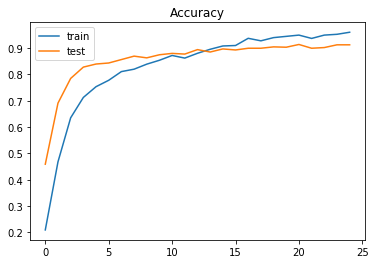

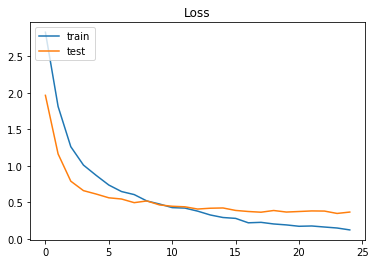

In [ ]:
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### テストデータに対する混同行列

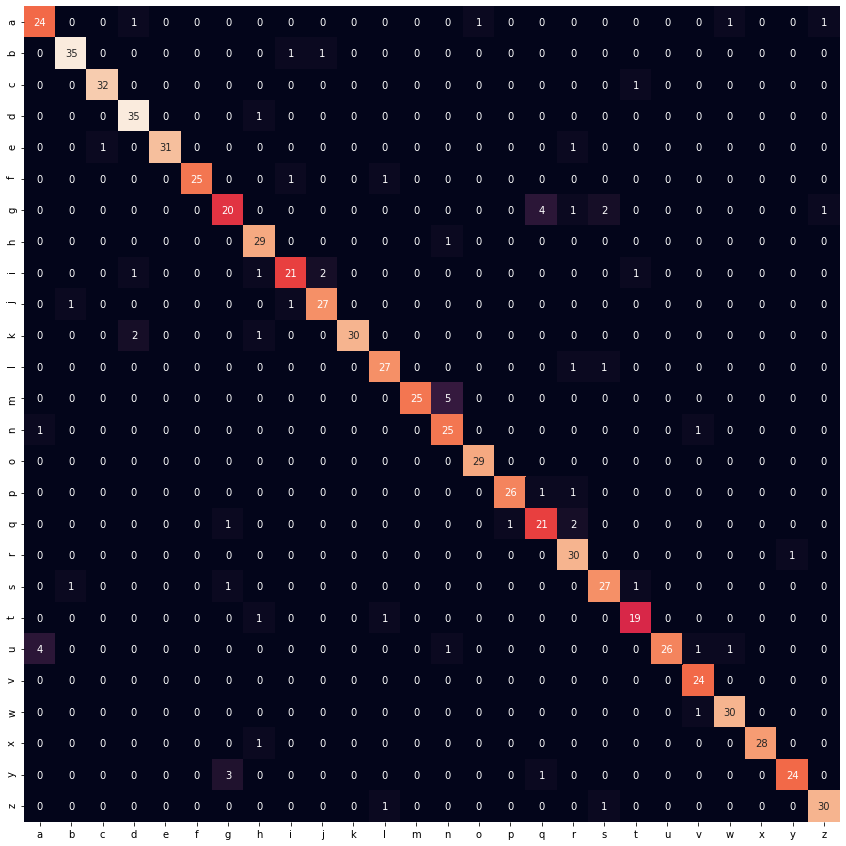

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted = np.argmax(model.predict(X_test), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=n2c.values(), columns=n2c.values())
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## RNN
オンライン文字の署名データを本人か別人かを識別する。(Signature Verification)<br>
筆者認証では、ユーザーごとにモデルを作成し、本人か別人かの2値分類をする。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
import glob

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

### データについて

#### データの説明

SVC2004_Task1_5users.npzは、5名分のオンライン文字の署名データが記録してある。<br>
オンライン文字は、それぞれの長さをそろえるために足りない部分を-1で埋めてある。<br>
オンライン文字データに加え、以下のデータも記録してある。
* 対象ユーザー
* 本人が書いたものか別人による偽物か
* 実際のデータの長さ

オンライン文字データには、以下のデータが記録してある。
* Stroke Number - current stroke number (if -1, pen-up state)
* X-coordinate - scaled cursor position along the x-axis
* Y-coordinate - scaled cursor position along the y-axis
* Time stamp - system time at which the event was posted

#### データのロード

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z" -O SVC2004_Task1_5users.npz

--2021-05-10 06:46:11--  https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z
Resolving drive.google.com (drive.google.com)... 74.125.133.100, 74.125.133.138, 74.125.133.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.133.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hhh3ih0gm5bcqujhsud937l68j4fnn6s/1620629100000/12360162376384578551/*/1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z?e=download [following]
--2021-05-10 06:46:12--  https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hhh3ih0gm5bcqujhsud937l68j4fnn6s/1620629100000/12360162376384578551/*/1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z?e=download
Resolving doc-14-3c-docs.googleusercontent.com (doc-14-3c-docs.googleusercontent.com)... 74.125.133.132, 2a00:1450:400c:c07::84
Connecting to doc-14-3c-docs.googleusercontent.com (doc-14

In [ ]:
data = np.load("SVC2004_Task1_5users.npz")

In [ ]:
X = data["x"]
user = data["user"]
genuine = data["genuine"]
X_length = data["x_length"]

In [ ]:
num_user = max(user) + 1
timesteps, features = X.shape[-2:]
print("Number of Users:", num_user)
print("Timesteps:", timesteps)
print("Features:", features)

Number of Users: 5
Timesteps: 784
Features: 4


#### データを眺める

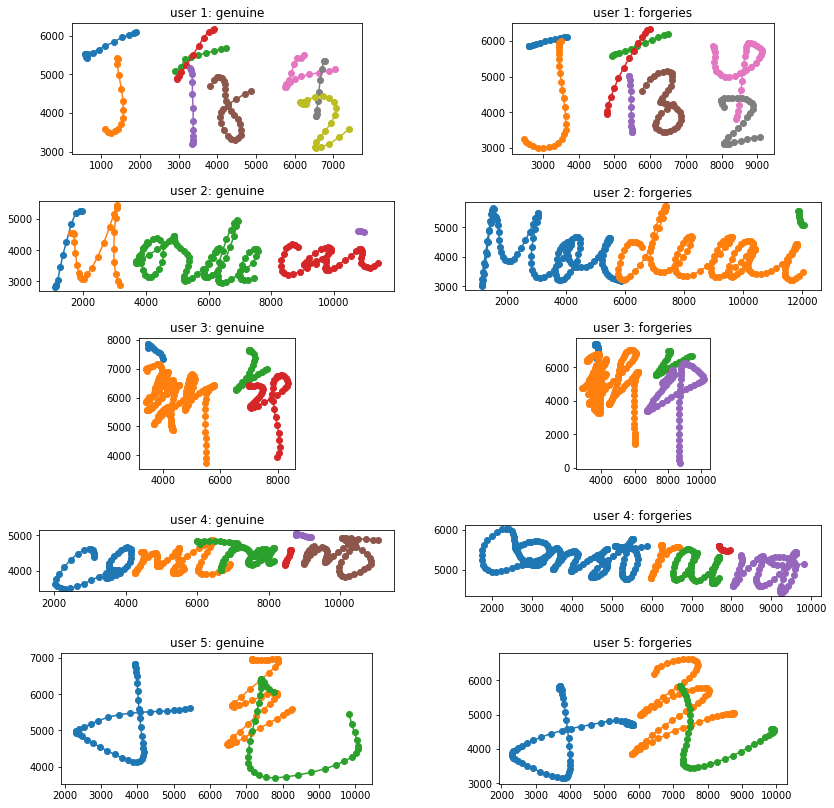

In [ ]:
fig = plt.figure(figsize=(14, 14))
for i in range(num_user):
  for j in range(2):
    data = X[user==i][j*20]
    n_stroke = data[:, 0].max()
    ax = fig.add_subplot(5, 2, i*2+j+1)
    for i_stroke in range(n_stroke+1):
      ax.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
      ax.set_title(f'user {i+1}: {"genuine" if j == 0 else "forgeries"}')
      ax.set_aspect('equal')

### 必要な関数

#### kerasをリセットするための関数

In [ ]:
import gc
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1.keras.backend import clear_session
from tensorflow.compat.v1.keras.backend import get_session
import tensorflow

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    # print(gc.collect()) # if it's done something you should see a number being outputted
    gc.collect()

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

#### EER (Equal Error Rate) を取得するための関数

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def get_eer(y_true, y_score):
  fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
  fnr = 1 - tpr
  eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
  EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
  return EER

### モデルについて

#### モデルの構築
* RNNのモデルを作成せよ。構造を変えたときの変化を確認せよ。
* compile時のLossとOptimizerによる変化を確認せよ。

Bidirectional LSTM<br>
https://keras.io/examples/imdb_bidirectional_lstm/<br>
Stacked LSTM<br>
https://keras.io/getting-started/sequential-model-guide/#stacked-lstm-for-sequence-classification<br>

In [ ]:
def build_model(input_shape):
  model = ?

  model.compile(loss=?,
                optimizer=?,
                ?)
  return model

SyntaxError: ignored

#### ハイパーパラメータ
* パラメータを自分で調整して、変化を確認せよ

In [ ]:
batch_size = ?
epochs = ?

#### モデルの学習

In [ ]:
train_EER_list = []
test_EER_list = []
test_size = 0.2
for user_index in range(num_user):
  print("user_index:", user_index)
  mask = user == user_index
  X_train, X_test, y_train, y_test = train_test_split(X[mask], genuine[mask], test_size=test_size, random_state=7, shuffle=True, stratify=genuine[mask])
  model = build_model(input_shape=(timesteps, features))
  model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_eer = get_eer(y_train, pred_train)
  test_eer = get_eer(y_test, pred_test)
  print("train EER(%):", train_eer*100)
  print("test EER(%):", test_eer*100)
  train_EER_list.append(train_eer*100)
  test_EER_list.append(test_eer*100)
  del model
  #reset_keras()
  #gc.collect()
  print()
  # break

user_index: 0




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





Train on 32 samples, validate on 8 samples
Epoch 1/20





32/32 [==============================] - 18s 549ms/step - loss: 0.7527 - acc: 0.4375 - val_loss: 0.6022 - val_acc: 0.5000
Epoch 2/20
32/32 [==============================] - 13s 408ms/step - loss: 0.6067 - acc: 0.6875 - val_loss: 0.5406 - val_acc: 0.6250
Epoch 3/20
32/32 [==============================] - 12s 374ms/step - loss: 0.5613 - acc: 0.7188 - val_loss: 0.5708 - val_acc: 0.6250
Epoch 4/20
32/32 [==============================] - 13s 412ms/step - loss: 0.5300 - acc: 0.7500 - val_loss: 0.5087 - val_acc: 0.8750
Epoch 5/20
32/32 [==============================] - 12s 389ms/step - loss: 0.5153 - acc: 0.8125 - val_loss: 0.5005 - val_acc: 0.8750
Epoch 6/20
32/32 [==============================] - 12s

### 結果について

#### 精度の評価

In [ ]:
print("Average Train EER(%):", np.mean(train_EER_list))
print("Average Test EER(%):", np.mean(test_EER_list))

Average Train EER(%): 7.5
Average Test EER(%): 25.0
